MINIPROJECT 1


Loading the dataset "goemotions.json"

In [18]:
#Importing Libraries
import json
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')

#Task 1.2
#Loading dataset and storing them into lists
dictionary = json.load(open('goemotions.json', 'r'))
emotions=[]
sentiments=[]
Posts=[]

for i in range(len(dictionary)):
    Posts.append((dictionary[i])[0])
    emotions.append((dictionary[i])[1])
    sentiments.append((dictionary[i])[2])

Emotions Histogram
______________________________________________________________________________

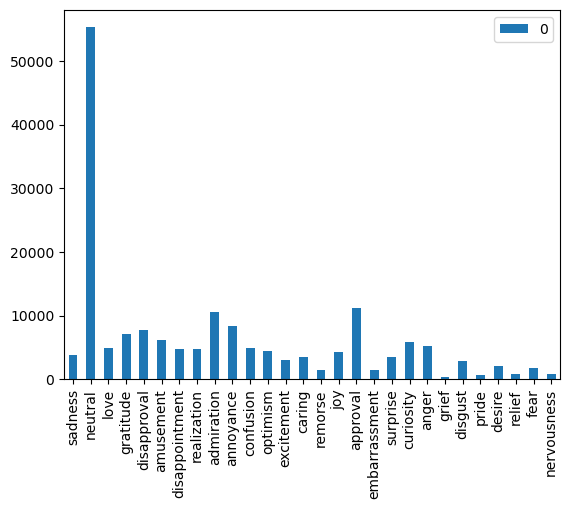

In [3]:
#Task 1.3
%matplotlib inline
import pandas
from collections import Counter
# plotting emotions
letter_counts = Counter(emotions)
df = pandas.DataFrame.from_dict(letter_counts, orient='index')
plot=df.plot(kind='bar')
fig = plot.get_figure()
#Saving the emotions histogram into a pdf
fig.savefig('Emotions.pdf')

Sentiments Histogram
______________________________________________________________________________

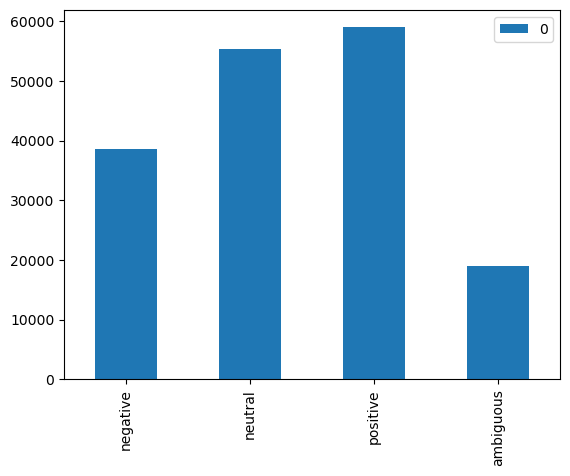

In [4]:
# plotting sentiments
letter_counts = Counter(sentiments)
df = pandas.DataFrame.from_dict(letter_counts, orient='index')
plot=df.plot(kind='bar')
fig = plot.get_figure()
#Saving the sentiments histogram into a pdf
fig.savefig('Sentiments.pdf')

Preprocessing
______________________________________________________________________________

In [5]:
#Task 2.1
#Making the lists into arrays unsing numpy
posts_array = np.array(Posts)
emotions_array = np.array(emotions)
sentiments_array = np.array(sentiments)
#vectorizing the array to pass to training set
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(posts_array)

print("Vocabulary size: ",len(vectorizer.get_feature_names_out()))


Vocabulary size:  30449


Splitting the training set 80/20
______________________________________________________________________________

In [6]:
#Task 2.2
#trainging_size=0.8, test_size=0.2
X_train, X_test, Y1_train, Y1_test, Y2_train, Y2_test = train_test_split(X,emotions_array, sentiments_array, test_size=0.2)

Multinomial Naive Bayes Classifier with default parameters
______________________________________________________________________________

In [24]:
#Task 2.3.1
#Multinomial NB for Emotions
MNB=MultinomialNB()
MNB.fit(X_train,Y1_train)

MultinomialNB()

In [25]:
#Multinomial NB for Sentiments
MNB2=MultinomialNB()
MNB2.fit(X_train,Y2_train)

MultinomialNB()

In [26]:
#print the results of emotions with MultinomialNB
from sklearn.metrics import classification_report
predictions_emotions = MNB.predict(X_test)
print('MultinomialNB Classification for Sentiments')
print("Precision: ",precision_score(Y1_test, predictions_emotions, average='macro'))
print("Recall: ", recall_score(Y1_test, predictions_emotions, average='macro'))
print("F-Mesure: ", f1_score(Y1_test, predictions_emotions, average='macro'))
print(classification_report(Y1_test, predictions_emotions))

MultinomialNB Classification for Sentiments
Precision:  0.3376429991911433
Recall:  0.1399398833362502
F-Mesure:  0.16453302505467468
                precision    recall  f1-score   support

    admiration       0.48      0.46      0.47      2151
     amusement       0.51      0.28      0.36      1193
         anger       0.36      0.11      0.17      1074
     annoyance       0.18      0.07      0.10      1631
      approval       0.25      0.09      0.13      2225
        caring       0.26      0.05      0.09       691
     confusion       0.36      0.07      0.11       976
     curiosity       0.37      0.10      0.15      1198
        desire       0.41      0.04      0.07       427
disappointment       0.27      0.04      0.07       903
   disapproval       0.28      0.09      0.13      1548
       disgust       0.50      0.08      0.13       579
 embarrassment       0.50      0.01      0.02       257
    excitement       0.25      0.03      0.06       559
          fear       0.41

In [9]:
#print the results of sentiments with MultinomialNB
predictions_sentiments = MNB2.predict(X_test)
print('MultinomialNB Classification for Emotions')
print("Precision: ",precision_score(Y2_test, predictions_sentiments, average='macro'))
print("Recall: ", recall_score(Y2_test, predictions_sentiments, average='macro'))
print("F-Mesure: ", f1_score(Y2_test, predictions_sentiments, average='macro'))
print(classification_report(Y2_test, predictions_sentiments))

MultinomialNB Classification for Emotions
Precision:  0.5161513522155048
Recall:  0.490985174796839
F-Mesure:  0.49706900572287893
              precision    recall  f1-score   support

   ambiguous       0.43      0.25      0.31      3837
    negative       0.53      0.52      0.53      7649
     neutral       0.48      0.50      0.49     11015
    positive       0.62      0.70      0.66     11863

    accuracy                           0.54     34364
   macro avg       0.52      0.49      0.50     34364
weighted avg       0.54      0.54      0.54     34364



Decision Trees with default parameters
______________________________________________________________________________

In [10]:
#Task 2.3.2
#Decision Tree for Emotions
from sklearn.tree import DecisionTreeClassifier
dt_classifier1 = DecisionTreeClassifier()
dt_classifier1.fit(X_train, Y1_train)

DecisionTreeClassifier()

In [11]:
#print the results of emotions with Decision Tree
prediction = dt_classifier1.predict(X_test)
print("Precision: ",precision_score(Y1_test, prediction, average='macro'))
print("Recall: ", recall_score(Y1_test, prediction, average='macro'))
print("F-Mesure: ", f1_score(Y1_test, prediction, average='macro'))
"""
classes = ["class: "+emotions[0], "class: "+emotions[1], "class: "+emotions[2], "class: "+emotions[3], "class: "+emotions[4],
"class: "+emotions[5], "class: "+emotions[6], "class: "+emotions[7], "class: "+emotions[8], "class: "+emotions[9],
"class: "+emotions[10], "class: "+emotions[11], "class: "+emotions[12], "class: "+emotions[13], "class: "+emotions[14],
"class: "+emotions[15], "class: "+emotions[16], "class: "+emotions[17], "class: "+emotions[18], "class: "+emotions[19],
"class: "+emotions[20], "class: "+emotions[21], "class: "+emotions[22], "class: "+emotions[23],"class: "+emotions[24],"class: "+emotions[25],
"class: "+emotions[26],"class: "+emotions[27]]
"""
print(classification_report(Y1_test, prediction))

Precision:  0.2987362529967822
Recall:  0.27801008491332213
F-Mesure:  0.28008876449705306
                precision    recall  f1-score   support

    admiration       0.40      0.57      0.47      2113
     amusement       0.42      0.59      0.49      1238
         anger       0.22      0.36      0.28      1014
     annoyance       0.15      0.22      0.18      1699
      approval       0.20      0.27      0.23      2290
        caring       0.24      0.27      0.25       727
     confusion       0.22      0.27      0.24      1021
     curiosity       0.33      0.36      0.35      1218
        desire       0.23      0.25      0.24       410
disappointment       0.18      0.20      0.19       994
   disapproval       0.25      0.24      0.24      1500
       disgust       0.28      0.23      0.25       583
 embarrassment       0.22      0.18      0.20       281
    excitement       0.25      0.24      0.24       594
          fear       0.42      0.38      0.40       326
     gratitu

In [12]:
#Decision Tree for Sentiments
dt_classifier2 = DecisionTreeClassifier()
dt_classifier2.fit(X_train, Y2_train)

DecisionTreeClassifier()

In [13]:
#print the results of sentiments with Decision Tree
prediction2 = dt_classifier2.predict(X_test)
print("Precision: ",precision_score(Y2_test, prediction2, average='macro'))
print("Recall: ", recall_score(Y2_test, prediction2, average='macro'))
print("F-Mesure: ", f1_score(Y2_test, prediction2, average='macro'))

#classes = ["class: "+sentiments[0], "class: "+sentiments[1], "class: "+sentiments[2], "class: "+sentiments[3]]
print(classification_report(Y2_test, prediction2))

Precision:  0.5180538155446187
Recall:  0.5339974858254153
F-Mesure:  0.5209129302716957
              precision    recall  f1-score   support

   ambiguous       0.35      0.48      0.41      3837
    negative       0.50      0.60      0.54      7649
     neutral       0.51      0.47      0.49     11015
    positive       0.71      0.59      0.64     11863

    accuracy                           0.54     34364
   macro avg       0.52      0.53      0.52     34364
weighted avg       0.56      0.54      0.55     34364



Multi-Layered Perceptrons with default parameters
______________________________________________________________________________

In [14]:
#Task 2.3.3
from sklearn.neural_network import MLPClassifier
#MLPClassifier for emotions
mlp = MLPClassifier(max_iter=1)
mlp.fit(X_train, Y1_train)
#MLPClassifier for sentiments
mlp2 = MLPClassifier(max_iter=1)
mlp2.fit(X_train, Y2_train)

MLPClassifier(max_iter=1)

In [15]:
#print the results of emoptions with MLPClassifier
y1_pred = mlp.predict(X_test)
print("Emotions using MLPClassifier with default parameters")
print("Precision: ",precision_score(Y1_test, y1_pred, average='macro'))
print("Recall: ", recall_score(Y1_test, y1_pred, average='macro'))
print("F-Mesure: ", f1_score(Y1_test, y1_pred, average='macro'))
print(classification_report(Y1_test, y1_pred,zero_division = 'warn'))

#print(f"Score: {mlp.score(X_test,Y1_test)}")
#metrics(Y1_test, y1_pred)
#cmd = ConfusionMatrixDisplay(confusion_matrix(y_true = Y1_test, y_pred = y1_pred))
#figure, axis = plt.subplots(figsize=(18,18))
#cmd.plot(ax = axis, cmap = 'plasma')

Emotions using MLPClassifier with default parameters
Precision:  0.38053684494153023
Recall:  0.22483115122578848
F-Mesure:  0.24330830896709152
                precision    recall  f1-score   support

    admiration       0.51      0.51      0.51      2113
     amusement       0.53      0.59      0.56      1238
         anger       0.34      0.26      0.29      1014
     annoyance       0.26      0.06      0.10      1699
      approval       0.37      0.06      0.10      2290
        caring       0.32      0.05      0.09       727
     confusion       0.40      0.06      0.11      1021
     curiosity       0.40      0.12      0.18      1218
        desire       0.40      0.20      0.27       410
disappointment       0.31      0.02      0.04       994
   disapproval       0.26      0.04      0.07      1500
       disgust       0.47      0.19      0.27       583
 embarrassment       0.50      0.01      0.03       281
    excitement       0.68      0.09      0.16       594
          fear

In [16]:
#print the results of sentiments with MLPClassifier
y2_pred = mlp2.predict(X_test)
print("Sentiments using MLPClassifier with default parameters")
print("Precision: ",precision_score(Y2_test, y2_pred, average='macro'))
print("Recall: ", recall_score(Y2_test, y2_pred, average='macro'))
print("F-Mesure: ", f1_score(Y2_test, y2_pred, average='macro'))
print(classification_report(Y2_test, y2_pred))

Sentiments using MLPClassifier with default parameters
Precision:  0.5551478885007217
Recall:  0.5027459014027902
F-Mesure:  0.5132487444076885
              precision    recall  f1-score   support

   ambiguous       0.48      0.22      0.30      3837
    negative       0.57      0.49      0.53      7649
     neutral       0.48      0.63      0.54     11015
    positive       0.69      0.67      0.68     11863

    accuracy                           0.57     34364
   macro avg       0.56      0.50      0.51     34364
weighted avg       0.57      0.57      0.56     34364



Multinomial Naive Bayes Classifier found using GridSearchCV
______________________________________________________________________________

In [17]:
#Task2.3.4
from sklearn.model_selection import GridSearchCV

#Parameters
param_grid = {"alpha": [0.0, 0.5, 1.5, 2.0]}

grid_search1 = GridSearchCV(MultinomialNB(), param_grid)
grid_search2 = GridSearchCV(MultinomialNB(), param_grid)

In [18]:
#MultinomialNB using GridSearchCV for emotions
grid_search1.fit(X_train, Y1_train)
predictions_gridemotions = grid_search1.predict(X_test)

In [19]:
#MultinomialNB using GridSearchCV for sentiments
grid_search2.fit(X_train, Y2_train)
predictions_gridsentiments = grid_search2.predict(X_test)

In [20]:
#test the accuracy, precision and f1 score for emotions after using grid search
print('Multinomial NB Grid Search Classification for Emotions with ', param_grid)
print("Precision: ",precision_score(Y1_test, predictions_gridemotions, average='macro'))
print("Recall: ", recall_score(Y1_test, predictions_gridemotions, average='macro'))
print("F-Mesure: ", f1_score(Y1_test, predictions_gridemotions, average='macro'))
print(classification_report(Y1_test, predictions_gridemotions))
print(grid_search1.best_params_)
print(grid_search1.best_score_)

Multinomial NB Grid Search Classification for Emotions with  {'alpha': [0.0, 0.5, 1.5, 2.0]}
Precision:  0.32521771205370475
Recall:  0.19308746253500914
F-Mesure:  0.21972857185024003
                precision    recall  f1-score   support

    admiration       0.46      0.51      0.48      2113
     amusement       0.51      0.45      0.48      1238
         anger       0.32      0.20      0.25      1014
     annoyance       0.20      0.11      0.14      1699
      approval       0.22      0.12      0.16      2290
        caring       0.25      0.15      0.19       727
     confusion       0.27      0.11      0.16      1021
     curiosity       0.32      0.17      0.22      1218
        desire       0.31      0.10      0.15       410
disappointment       0.22      0.07      0.11       994
   disapproval       0.22      0.13      0.16      1500
       disgust       0.40      0.16      0.23       583
 embarrassment       0.38      0.05      0.09       281
    excitement       0.32     

In [21]:
#test the accuracy, precision and  f1 score for sentiments after using grid search
print('Multinomial NB Grid Search Classification for Sentiments with ', param_grid)
print("Precision: ",precision_score(Y2_test, predictions_gridsentiments, average='macro'))
print("Recall: ", recall_score(Y2_test, predictions_gridsentiments, average='macro'))
print("F-Mesure: ", f1_score(Y2_test, predictions_gridsentiments, average='macro'))
print(classification_report(Y2_test, predictions_gridsentiments))
print(grid_search2.best_params_)
print(grid_search2.best_score_)

Multinomial NB Grid Search Classification for Sentiments with  {'alpha': [0.0, 0.5, 1.5, 2.0]}
Precision:  0.5174109543354889
Recall:  0.4792065950497737
F-Mesure:  0.48490391007782646
              precision    recall  f1-score   support

   ambiguous       0.44      0.19      0.26      3837
    negative       0.54      0.51      0.52      7649
     neutral       0.48      0.52      0.50     11015
    positive       0.62      0.71      0.66     11863

    accuracy                           0.54     34364
   macro avg       0.52      0.48      0.48     34364
weighted avg       0.53      0.54      0.53     34364

{'alpha': 1.5}
0.5392925543670779


Decision Tree found using GridSearchCV
______________________________________________________________________________

In [25]:
#Task 2.3.5
from sklearn.model_selection import GridSearchCV

#Parameters
dt_params = {'criterion': ['gini', 'entropy'],  
              'max_depth': [1000,10000], 
              'min_samples_split':[1, 3, 5]}  

#Decision Tree using GridSearchCV for emotions
clf_emotions = GridSearchCV(dt_classifier1, dt_params)
clf_emotions.fit(X_train, Y1_train)
predictions_gridemotions_dtree = clf_emotions.predict(X_test)
print('Grid Search Classification for Decision Tree Emotions with ', dt_params)
print(classification_report(Y1_test, predictions_gridemotions_dtree))
print(clf_emotions.best_params_)
print(clf_emotions.best_score_)

Grid Search Classification for Decision Tree Emotions with  {'criterion': ['gini', 'entropy'], 'max_depth': [1000, 10000], 'min_samples_split': [1, 3, 5]}
                precision    recall  f1-score   support

    admiration       0.40      0.57      0.47      2113
     amusement       0.42      0.58      0.49      1238
         anger       0.22      0.35      0.27      1014
     annoyance       0.15      0.21      0.17      1699
      approval       0.20      0.26      0.22      2290
        caring       0.22      0.26      0.24       727
     confusion       0.22      0.26      0.24      1021
     curiosity       0.33      0.35      0.34      1218
        desire       0.23      0.24      0.24       410
disappointment       0.18      0.19      0.18       994
   disapproval       0.24      0.23      0.23      1500
       disgust       0.27      0.20      0.23       583
 embarrassment       0.21      0.17      0.19       281
    excitement       0.24      0.22      0.23       594
    

In [26]:
#Decision Tree using GridSearchCV for sentiments
dt_params = {'criterion': ['gini', 'entropy'],  
              'max_depth': [1000,10000], 
              'min_samples_split':[1, 3, 5]}  

clf_sentiments = GridSearchCV(dt_classifier2, dt_params)
clf_sentiments.fit(X_train, Y2_train)
predictions_gridsentiments_dtree = clf_sentiments.predict(X_test)
print('Grid Search Classification for Decision Tree Sentiments with ', dt_params)
print(classification_report(Y2_test, predictions_gridsentiments_dtree))
print(clf_sentiments.best_params_)
print(clf_sentiments.best_score_)

Grid Search Classification for Decision Tree Sentiments with  {'criterion': ['gini', 'entropy'], 'max_depth': [1000, 10000], 'min_samples_split': [1, 3, 5]}
              precision    recall  f1-score   support

   ambiguous       0.35      0.47      0.40      3837
    negative       0.50      0.59      0.54      7649
     neutral       0.51      0.48      0.49     11015
    positive       0.71      0.59      0.64     11863

    accuracy                           0.54     34364
   macro avg       0.52      0.53      0.52     34364
weighted avg       0.56      0.54      0.55     34364

{'criterion': 'gini', 'max_depth': 1000, 'min_samples_split': 5}
0.5292238964197761


Multi-Layered Perceptron using GridSearchCV
______________________________________________________________________________

In [22]:
#Task 2.3.6
#Parameters
params={'activation':['identity', 'logistic', 'tanh', 'relu'], 'solver':['adam', 'sgd'], 'hidden_layer_sizes': [[10,15],[10,10,10]]}
#MLPClassifier using GridSearchCV for emotions
top_mlp = GridSearchCV(estimator = MLPClassifier(max_iter=1), param_grid = params)
top_mlp.fit(X_train, Y1_train)
#MLPClassifier using GridSearchCV for sentiments
top_mlp2 = GridSearchCV(estimator = MLPClassifier(max_iter=1), param_grid = params)
top_mlp2.fit(X_train, Y2_train)

GridSearchCV(estimator=MLPClassifier(max_iter=1),
             param_grid={'activation': ['identity', 'logistic', 'tanh', 'relu'],
                         'hidden_layer_sizes': [[10, 15], [10, 10, 10]],
                         'solver': ['adam', 'sgd']})

In [23]:
#TOP-MLP for Emotions
y_pred_mlp = top_mlp.predict(X_test)
print("Emotions using GridSearchCV() with MLPClassifer()")
print("Precision: ",precision_score(Y1_test, y_pred_mlp, average='macro'))
print("Recall: ", recall_score(Y1_test, y_pred_mlp, average='macro'))
print("F-Mesure: ", f1_score(Y1_test, y_pred_mlp, average='macro'))
print(classification_report(Y1_test, y_pred_mlp))
print(top_mlp.best_params_)
print(top_mlp.best_score_)


Emotions using GridSearchCV() with MLPClassifer()
Precision:  0.2167011369334797
Recall:  0.13997960999390527
F-Mesure:  0.13368835141645172
                precision    recall  f1-score   support

    admiration       0.45      0.40      0.43      2113
     amusement       0.52      0.47      0.50      1238
         anger       0.00      0.00      0.00      1014
     annoyance       0.00      0.00      0.00      1699
      approval       0.00      0.00      0.00      2290
        caring       0.00      0.00      0.00       727
     confusion       0.25      0.00      0.00      1021
     curiosity       0.47      0.03      0.05      1218
        desire       0.00      0.00      0.00       410
disappointment       0.00      0.00      0.00       994
   disapproval       0.10      0.00      0.01      1500
       disgust       1.00      0.00      0.01       583
 embarrassment       0.00      0.00      0.00       281
    excitement       0.00      0.00      0.00       594
          fear    

In [24]:
#TOP-MLP for Sentiments
y2_pred_mlp = top_mlp2.predict(X_test)
print("Sentiments using GridSearchCV() with MLPClassifer()")
print("Precision: ",precision_score(Y2_test, y2_pred_mlp, average='macro'))
print("Recall: ", recall_score(Y2_test, y2_pred_mlp, average='macro'))
print("F-Mesure: ", f1_score(Y2_test, y2_pred_mlp, average='macro'))
print(classification_report(Y2_test, y2_pred_mlp))
print(top_mlp2.best_params_)
print(top_mlp2.best_score_)

Sentiments using GridSearchCV() with MLPClassifer()
Precision:  0.547332558129049
Recall:  0.4977082178678639
F-Mesure:  0.507195408403306
              precision    recall  f1-score   support

   ambiguous       0.47      0.21      0.29      3837
    negative       0.57      0.49      0.53      7649
     neutral       0.48      0.62      0.54     11015
    positive       0.68      0.68      0.68     11863

    accuracy                           0.56     34364
   macro avg       0.55      0.50      0.51     34364
weighted avg       0.57      0.56      0.56     34364

{'activation': 'tanh', 'hidden_layer_sizes': [10, 15], 'solver': 'adam'}
0.5596554496893056


Writing all results into a "Performance" file
______________________________________________________________________________

In [27]:
#Task 2.4
from sklearn.metrics import confusion_matrix
f=open('performance.txt','w+')

#regular   
#MNB
f.write(('MultinomialNB Classification for Emotions\n'))
f.write(str(("Precision: ",precision_score(Y1_test, predictions_emotions, average='macro'))))
f.write(str(("Recall: ", recall_score(Y1_test, predictions_emotions, average='macro'))))
f.write(str(("F-Mesure: ", f1_score(Y1_test, predictions_emotions, average='macro'))))
f.write('\n') 
f.write((classification_report(Y1_test, predictions_emotions)))
f.write('\n')  
f.write(('MultinomialNB Classification for Sentiments\n'))
f.write(str(("Precision: ",precision_score(Y2_test, predictions_sentiments, average='macro'))))
f.write(str(("Recall: ", recall_score(Y2_test, predictions_sentiments, average='macro'))))
f.write(str(("F-Mesure: ", f1_score(Y2_test, predictions_sentiments, average='macro'))))
f.write('\n') 
f.write((classification_report(Y2_test, predictions_sentiments)))
f.write('\n') 

#Decision Tree
f.write(('Decision Tree Classification for Emotions\n'))
f.write(str(("Precision: ",precision_score(Y1_test, prediction, average='macro'))))
f.write(str(("Recall: ", recall_score(Y1_test, prediction, average='macro'))))
f.write(str(("F-Mesure: ", f1_score(Y1_test, prediction, average='macro'))))
f.write('\n') 
f.write((classification_report(Y1_test, prediction)))
f.write('\n')  
f.write(('Decision Tree Classification for Sentiments\n'))
f.write(str(("Precision: ",precision_score(Y2_test, prediction2, average='macro'))))
f.write(str(("Recall: ", recall_score(Y2_test, prediction2, average='macro'))))
f.write(str(("F-Mesure: ", f1_score(Y2_test, prediction2, average='macro'))))
f.write('\n') 
f.write((classification_report(Y2_test, prediction2)))
f.write('\n') 

#Base-MLP
f.write(('Base-MLP Classification for Emotions\n'))
f.write(str(("Precision: ",precision_score(Y1_test, y1_pred, average='macro'))))
f.write(str(("Recall: ", recall_score(Y1_test, y1_pred, average='macro'))))
f.write(str(("F-Mesure: ", f1_score(Y1_test, y1_pred, average='macro'))))
f.write('\n') 
f.write((classification_report(Y1_test, y1_pred)))
f.write('\n')  
f.write(('Base-MLP Classification for Sentiments\n'))
f.write(str(("Precision: ",precision_score(Y2_test, y2_pred, average='macro'))))
f.write(str(("Recall: ", recall_score(Y2_test, y2_pred, average='macro'))))
f.write(str(("F-Mesure: ", f1_score(Y2_test, y2_pred, average='macro'))))
f.write('\n') 
f.write((classification_report(Y2_test, y2_pred)))
f.write('\n') 


#gridsearch
#MNB
f.write('Grid Search Classification for Emotions for MultinomialNB with alpha: [0.0, 0.5, 1.5, 2.0]\n')
f.write(str(("Precision: ",precision_score(Y1_test, predictions_gridemotions, average='macro'))))
f.write(str(("Recall: ", recall_score(Y1_test, predictions_gridemotions, average='macro'))))
f.write(str(("F-Mesure: ", f1_score(Y1_test, predictions_gridemotions, average='macro'))))
f.write('\n') 
f.write((classification_report(Y1_test, predictions_gridemotions)))
f.write('\n')    

f.write(('Grid Search Classification for Sentiments for MultinomialNB with alpha: [0.0, 0.5, 1.5, 2.0]\n'))
f.write(str(("Precision: ",precision_score(Y2_test, predictions_gridsentiments, average='macro'))))
f.write(str(("Recall: ", recall_score(Y2_test, predictions_gridsentiments, average='macro'))))
f.write(str(("F-Mesure: ", f1_score(Y2_test, predictions_gridsentiments, average='macro'))))
f.write('\n') 
f.write((classification_report(Y2_test, predictions_gridsentiments)))
f.write('\n') 

#Decision Tree
f.write(('Grid Search Classification for Emotions for Decision Tree with dt_params = {''criterion'': [''gini'', ''entropy''],  ''max_depth: [1000,10000], min_samples_split:[1, 3, 5]}  \n'))
f.write(str(("Precision: ",precision_score(Y1_test, predictions_gridemotions_dtree, average='macro'))))
f.write(str(("Recall: ", recall_score(Y1_test, predictions_gridemotions_dtree, average='macro'))))
f.write(str(("F-Mesure: ", f1_score(Y1_test, predictions_gridemotions_dtree, average='macro'))))
f.write('\n') 
f.write((classification_report(Y1_test, predictions_gridemotions_dtree)))
f.write('\n')   

f.write(('Grid Search Classification for Sentiments for Decision Tree with dt_params = {''criterion'': [''gini'', ''entropy''],  ''max_depth: [1000,10000], min_samples_split:[1, 3, 5]}  \n'))
f.write(str(("Precision: ",precision_score(Y2_test, predictions_gridsentiments_dtree, average='macro'))))
f.write(str(("Recall: ", recall_score(Y2_test, predictions_gridsentiments_dtree, average='macro'))))
f.write(str(("F-Mesure: ", f1_score(Y2_test, predictions_gridsentiments_dtree, average='macro'))))
f.write('\n') 
f.write((classification_report(Y2_test, predictions_gridsentiments_dtree)))
f.write('\n') 
f.write('\n') 

#Top-MLP
f.write(('Grid Search Classification for Emotions for Top-MLP with params={activation:[identity, logistic, tanh, relu], solver:[adam, sgd], hidden_layer_sizes: [[3,5],[5,5,5]]}'))
f.write(str(("Precision: ",precision_score(Y1_test, y_pred_mlp, average='macro'))))
f.write(str(("Recall: " , recall_score(Y1_test, y_pred_mlp, average='macro'))))
f.write(str(("F-Mesure: ", f1_score(Y1_test, y_pred_mlp, average='macro'))))
f.write('\n') 
f.write((classification_report(Y1_test, y_pred_mlp)))
f.write('\n')   

f.write(('Grid Search Classification for Sentiments for Top-MLP with params={activation:[identity, logistic, tanh, relu], solver:[adam, sgd], hidden_layer_sizes: [[3,5],[5,5,5]]}'))
f.write(str(("Precision: ",precision_score(Y2_test, y2_pred_mlp, average='macro'))))
f.write(str(("Recall: " , recall_score(Y2_test, y2_pred_mlp, average='macro'))))
f.write(str(("F-Mesure: ", f1_score(Y2_test, y2_pred_mlp, average='macro'))))
f.write('\n') 
f.write((classification_report(Y2_test, y2_pred_mlp)))
f.write('\n') 
f.write('\n') 

#confusion Matrix
#MNB
f.write(('Confusion Matrix for Emotions and Posts for Multinomial NB\n'))
f.write(str(confusion_matrix(Y1_test,predictions_emotions)))
f.write('\n') 
f.write('\n') 
f.write(('Confusion Matrix for Sentiments and Posts for Multinomial NB\n'))
f.write(str(confusion_matrix(Y2_test,predictions_sentiments)))
f.write('\n') 

#Decision Tree
f.write(('Confusion Matrix for Emotions and Posts for Decision Tree\n'))
f.write(str(confusion_matrix(Y1_test,prediction)))
f.write('\n') 
f.write('\n') 
f.write(('Confusion Matrix for Sentiments and Posts for Decision Tree\n'))
f.write(str(confusion_matrix(Y2_test,prediction2)))
f.write('\n') 
      
#Base-MLP
f.write(('Confusion Matrix for Emotions and Posts for Base-MLP \n'))
f.write(str(confusion_matrix(Y1_test,y1_pred)))
f.write('\n') 
f.write('\n') 
f.write(('Confusion Matrix for Sentiments and Posts for Base-MLP\n'))
f.write(str(confusion_matrix(Y2_test,y2_pred)))
f.write('\n') 

#Gridsearch Confusion Matrix

#MNB
f.write('\n')         
f.write(('Confusion Matrix for Emotions and Posts using GridSearch for Multinomial NB\n'))
f.write(str(confusion_matrix(Y1_test,predictions_gridemotions)))
f.write('\n') 
f.write('\n') 
f.write(('Confusion Matrix for Sentiments and Posts using Gridsearch for Multinomial NB\n'))
f.write(str(confusion_matrix(Y2_test,predictions_gridsentiments)))
f.write('\n') 

#Decision Tree
f.write('\n')         
f.write(('Confusion Matrix for Emotions and Posts using GridSearch for Decision Tree\n'))
f.write(str(confusion_matrix(Y1_test,predictions_gridemotions_dtree)))
f.write('\n') 
f.write('\n') 
f.write(('Confusion Matrix for Sentiments and Posts using Gridsearch for Decision Tree\n'))
f.write(str(confusion_matrix(Y2_test,predictions_gridsentiments_dtree)))
f.write('\n') 

#Top-MLP
f.write(('Confusion Matrix for Emotions and Posts using GridSearch for Top-MLP \n'))
f.write(str(confusion_matrix(Y1_test,y_pred_mlp)))
f.write('\n') 
f.write('\n') 
f.write(('Confusion Matrix for Sentiments and Posts using GridSearch for Top-MLP\n'))
f.write(str(confusion_matrix(Y2_test,y2_pred_mlp)))
f.write('\n') 


f.close()
        

Redoing substeps of task 2.3 using TfidfTransformer
______________________________________________________________________________

In [8]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfTransformer
import pandas as pd 
from sklearn.tree import DecisionTreeClassifier
tfidf_transformer=TfidfTransformer(smooth_idf=True,use_idf=True)


Multinomial NB
______________________________________________________________________________

In [10]:
X1_train, X1_test, Y3_train, Y3_test = train_test_split(tfidf_transformer.fit_transform(X),emotions, test_size=0.2)
MNB3=MultinomialNB()
MNB3.fit(X1_train,Y3_train)


MultinomialNB()

In [11]:
X1_train, X1_test, Y4_train, Y4_test = train_test_split(tfidf_transformer.fit_transform(X),sentiments, test_size=0.2)
MNB4=MultinomialNB()
MNB4.fit(X1_train,Y4_train)

MultinomialNB()

In [46]:
predictions_emotions1 = MNB3.predict(X1_test)
predictions_sentiments2 = MNB4.predict(X1_test)

In [47]:
print('MultinomialNB Classification for Emotions using TfidfTransformer:')
print(classification_report(Y3_test, predictions_emotions1))

MultinomialNB Classification for Emotions using TfidfTransformer:
                precision    recall  f1-score   support

    admiration       0.07      0.01      0.02      2138
     amusement       0.00      0.00      0.00      1192
         anger       0.05      0.00      0.00      1090
     annoyance       0.00      0.00      0.00      1629
      approval       0.05      0.00      0.00      2303
        caring       0.00      0.00      0.00       691
     confusion       0.00      0.00      0.00       971
     curiosity       0.00      0.00      0.00      1167
        desire       0.00      0.00      0.00       405
disappointment       0.00      0.00      0.00       983
   disapproval       0.00      0.00      0.00      1534
       disgust       0.00      0.00      0.00       567
 embarrassment       0.00      0.00      0.00       302
    excitement       0.00      0.00      0.00       595
          fear       0.00      0.00      0.00       340
     gratitude       0.05      0.01  

In [48]:
print('MultinomialNB Classification for Sentiments using TfidfTransformer:')
print(classification_report(Y4_test, predictions_sentiments2))

MultinomialNB Classification for Sentiments using TfidfTransformer:
              precision    recall  f1-score   support

   ambiguous       0.61      0.03      0.06      3877
    negative       0.60      0.33      0.43      7646
     neutral       0.44      0.58      0.50     11011
    positive       0.57      0.74      0.64     11830

    accuracy                           0.52     34364
   macro avg       0.55      0.42      0.41     34364
weighted avg       0.54      0.52      0.48     34364



In [50]:
#gridsearch using TfidfTransformer
param_grid = {"alpha": [0.0, 0.5, 1.5, 2.0]}
grid_search3 = GridSearchCV(MultinomialNB(), param_grid)
grid_search4 = GridSearchCV(MultinomialNB(), param_grid)

In [51]:
#for emotions
grid_search3.fit(X1_train, Y3_train)
predictions_gridemotions3 = grid_search3.predict(X1_test)

In [52]:
#for sentiments
grid_search4.fit(X1_train, Y4_train)
predictions_gridsentiments4 = grid_search4.predict(X1_test)

In [53]:
#test the accuracy, precision and f1 score for emotions after using grid search and TfidfTransformer
print('Multinomial NB Grid Search Classification for Emotions using TfidfTransformer with ', param_grid)
print(classification_report(Y3_test, predictions_gridemotions3))

Multinomial NB Grid Search Classification for Emotions using TfidfTransformer with  {'alpha': [0.0, 0.5, 1.5, 2.0]}
                precision    recall  f1-score   support

    admiration       0.00      0.00      0.00      2138
     amusement       0.00      0.00      0.00      1192
         anger       0.00      0.00      0.00      1090
     annoyance       0.00      0.00      0.00      1629
      approval       0.00      0.00      0.00      2303
        caring       0.00      0.00      0.00       691
     confusion       0.00      0.00      0.00       971
     curiosity       0.00      0.00      0.00      1167
        desire       0.00      0.00      0.00       405
disappointment       0.00      0.00      0.00       983
   disapproval       0.00      0.00      0.00      1534
       disgust       0.00      0.00      0.00       567
 embarrassment       0.00      0.00      0.00       302
    excitement       0.00      0.00      0.00       595
          fear       0.00      0.00      0.

In [54]:
#test the accuracy, precision and f1 score for sentiments after using grid search and TfidfTransformer
print('Multinomial NB Grid Search Classification for Sentiments using TfidfTransformer with ', param_grid)
print(classification_report(Y4_test, predictions_gridsentiments4))

Multinomial NB Grid Search Classification for Sentiments using TfidfTransformer with  {'alpha': [0.0, 0.5, 1.5, 2.0]}
              precision    recall  f1-score   support

   ambiguous       0.54      0.07      0.13      3877
    negative       0.57      0.39      0.46      7646
     neutral       0.45      0.56      0.50     11011
    positive       0.58      0.73      0.64     11830

    accuracy                           0.52     34364
   macro avg       0.53      0.44      0.43     34364
weighted avg       0.53      0.52      0.50     34364



Decision Tree
______________________________________________________________________________

In [12]:
#Decision tree Classification for Emotions using TfidfTransformer
#Emotions
dt_classifier3=DecisionTreeClassifier()
dt_classifier3.fit(X1_train,Y3_train)
#Sentiments
dt_classifier4=DecisionTreeClassifier()
dt_classifier4.fit(X1_train,Y4_train)

DecisionTreeClassifier()

In [15]:
print('Decision tree Classification for Emotions using TfidfTransformer:')
predictions_DTemotions3=dt_classifier3.predict(X1_test)
print(classification_report(Y3_test, predictions_DTemotions3))

Decision tree Classification for Emotions using TfidfTransformer:
                precision    recall  f1-score   support

    admiration       0.06      0.11      0.08      2083
     amusement       0.03      0.06      0.04      1200
         anger       0.03      0.05      0.04      1051
     annoyance       0.04      0.06      0.05      1671
      approval       0.06      0.09      0.07      2211
        caring       0.03      0.03      0.03       701
     confusion       0.03      0.04      0.03       973
     curiosity       0.03      0.04      0.04      1150
        desire       0.00      0.00      0.00       386
disappointment       0.03      0.04      0.04       936
   disapproval       0.05      0.05      0.05      1563
       disgust       0.02      0.02      0.02       572
 embarrassment       0.01      0.01      0.01       299
    excitement       0.02      0.01      0.01       627
          fear       0.01      0.01      0.01       360
     gratitude       0.04      0.03  

In [16]:
print('Decision tree Classification for Sentiments using TfidfTransformer:')
predictions_DTemotions4=dt_classifier4.predict(X1_test)
print(classification_report(Y4_test, predictions_DTemotions4))

Decision tree Classification for Sentiments using TfidfTransformer:
              precision    recall  f1-score   support

   ambiguous       0.35      0.48      0.41      3774
    negative       0.51      0.60      0.55      7679
     neutral       0.52      0.47      0.49     11118
    positive       0.71      0.60      0.65     11793

    accuracy                           0.55     34364
   macro avg       0.52      0.54      0.53     34364
weighted avg       0.56      0.55      0.55     34364



In [19]:
#DT gridsearch using TfidfTransformer
param_grid = {'criterion': ['gini', 'entropy'],  
              'max_depth': [1000,10000], 
              'min_samples_split':[1, 3, 5]} 
grid_search3 = GridSearchCV(DecisionTreeClassifier(), param_grid)
grid_search4 = GridSearchCV(DecisionTreeClassifier(), param_grid)

In [20]:
#for emotions
grid_search3.fit(X1_train, Y3_train)
predictions_gridemotions3 = grid_search3.predict(X1_test)

In [21]:
#for sentiments
grid_search4.fit(X1_train, Y4_train)
predictions_gridsentiments4 = grid_search4.predict(X1_test)

In [22]:
#test the accuracy, precision and f1 score for emotions after using grid search and TfidfTransformer
print('Decision Tree Grid Search Classification for Emotions using TfidfTransformer with ', param_grid)
print(classification_report(Y3_test, predictions_gridemotions3))

Decision Tree Grid Search Classification for Emotions using TfidfTransformer with  {'criterion': ['gini', 'entropy'], 'max_depth': [1000, 10000], 'min_samples_split': [1, 3, 5]}
                precision    recall  f1-score   support

    admiration       0.06      0.10      0.08      2083
     amusement       0.04      0.06      0.04      1200
         anger       0.03      0.04      0.03      1051
     annoyance       0.05      0.06      0.05      1671
      approval       0.07      0.08      0.07      2211
        caring       0.03      0.03      0.03       701
     confusion       0.03      0.03      0.03       973
     curiosity       0.03      0.03      0.03      1150
        desire       0.00      0.00      0.00       386
disappointment       0.04      0.03      0.03       936
   disapproval       0.05      0.04      0.04      1563
       disgust       0.02      0.02      0.02       572
 embarrassment       0.03      0.01      0.02       299
    excitement       0.01      0.00  

In [23]:
#test the accuracy, precision and f1 score for sentiments after using grid search and TfidfTransformer
print('Decision Tree Grid Search Classification for Sentiments using TfidfTransformer with ', param_grid)
print(classification_report(Y4_test, predictions_gridsentiments4))

Decision Tree Grid Search Classification for Sentiments using TfidfTransformer with  {'criterion': ['gini', 'entropy'], 'max_depth': [1000, 10000], 'min_samples_split': [1, 3, 5]}
              precision    recall  f1-score   support

   ambiguous       0.35      0.48      0.41      3774
    negative       0.51      0.60      0.55      7679
     neutral       0.52      0.47      0.49     11118
    positive       0.71      0.60      0.65     11793

    accuracy                           0.55     34364
   macro avg       0.52      0.54      0.53     34364
weighted avg       0.56      0.55      0.55     34364



MLPClassifier
______________________________________________________________________________

In [28]:
#MLP using TfidfTransformer
from sklearn.neural_network import MLPClassifier
mlp_tfidf = MLPClassifier(max_iter=1).fit(X1_train, Y3_train)
mlp_tfidf2 = MLPClassifier(max_iter=1).fit(X1_train, Y4_train)

In [29]:
y_pred_tfidf = mlp_tfidf.predict(X1_test)
y2_pred_tfidf = mlp_tfidf2.predict(X1_test)

In [30]:
#Emotions
print('Emotions MLP using TfidfTransformer:')
print(classification_report(Y3_test, y_pred_tfidf, zero_division = 'warn'))

Emotions MLP using TfidfTransformer:
                precision    recall  f1-score   support

    admiration       0.00      0.00      0.00      2083
     amusement       0.00      0.00      0.00      1200
         anger       0.00      0.00      0.00      1051
     annoyance       0.00      0.00      0.00      1671
      approval       0.00      0.00      0.00      2211
        caring       0.00      0.00      0.00       701
     confusion       0.00      0.00      0.00       973
     curiosity       0.00      0.00      0.00      1150
        desire       0.00      0.00      0.00       386
disappointment       0.00      0.00      0.00       936
   disapproval       0.00      0.00      0.00      1563
       disgust       0.00      0.00      0.00       572
 embarrassment       0.00      0.00      0.00       299
    excitement       0.00      0.00      0.00       627
          fear       0.00      0.00      0.00       360
     gratitude       0.00      0.00      0.00      1400
         g

In [31]:
#Sentiments
print('Sentiments MLP using TfidfTransformer:')
print(classification_report(Y4_test, y2_pred_tfidf, zero_division = 'warn'))

Sentiments MLP using TfidfTransformer:
              precision    recall  f1-score   support

   ambiguous       0.47      0.22      0.30      3774
    negative       0.57      0.51      0.54      7679
     neutral       0.49      0.57      0.53     11118
    positive       0.66      0.70      0.68     11793

    accuracy                           0.57     34364
   macro avg       0.55      0.50      0.51     34364
weighted avg       0.56      0.57      0.56     34364



In [32]:
#MLP GridSearch() with TfidfTransformer()
params={'activation':['identity', 'logistic', 'tanh', 'relu'], 'solver':['adam', 'sgd'], 'hidden_layer_sizes': [[10,15],[10,10,10]]}
top_mlp_tfidf = GridSearchCV(estimator = MLPClassifier(max_iter=1), param_grid = params)
top_mlp_tfidf.fit(X1_train, Y3_train)

top_mlp2_tfidf = GridSearchCV(estimator = MLPClassifier(max_iter=1), param_grid = params)
top_mlp2_tfidf.fit(X1_train, Y4_train)

GridSearchCV(estimator=MLPClassifier(max_iter=1),
             param_grid={'activation': ['identity', 'logistic', 'tanh', 'relu'],
                         'hidden_layer_sizes': [[10, 15], [10, 10, 10]],
                         'solver': ['adam', 'sgd']})

In [33]:
y_pred_mlp_tfidf = top_mlp_tfidf.predict(X1_test)
y2_pred_mlp_tfidf = top_mlp2_tfidf.predict(X1_test)

In [34]:
#Emotions
print('Emotions MLP GridSearch using TfidfTransformer with ', params)
print(classification_report(Y3_test, y_pred_mlp_tfidf))

Emotions MLP GridSearch using TfidfTransformer with  {'activation': ['identity', 'logistic', 'tanh', 'relu'], 'solver': ['adam', 'sgd'], 'hidden_layer_sizes': [[10, 15], [10, 10, 10]]}
                precision    recall  f1-score   support

    admiration       0.00      0.00      0.00      2083
     amusement       0.00      0.00      0.00      1200
         anger       0.00      0.00      0.00      1051
     annoyance       0.00      0.00      0.00      1671
      approval       0.00      0.00      0.00      2211
        caring       0.00      0.00      0.00       701
     confusion       0.00      0.00      0.00       973
     curiosity       0.00      0.00      0.00      1150
        desire       0.00      0.00      0.00       386
disappointment       0.00      0.00      0.00       936
   disapproval       0.00      0.00      0.00      1563
       disgust       0.00      0.00      0.00       572
 embarrassment       0.00      0.00      0.00       299
    excitement       0.00     

In [35]:
#Sentiments
print('Sentiments MLP GridSearch using TfidfTransformer with ', params)
print(classification_report(Y4_test, y2_pred_mlp_tfidf))

Sentiments MLP GridSearch using TfidfTransformer with  {'activation': ['identity', 'logistic', 'tanh', 'relu'], 'solver': ['adam', 'sgd'], 'hidden_layer_sizes': [[10, 15], [10, 10, 10]]}
              precision    recall  f1-score   support

   ambiguous       0.55      0.06      0.11      3774
    negative       0.55      0.52      0.54      7679
     neutral       0.46      0.61      0.52     11118
    positive       0.68      0.68      0.68     11793

    accuracy                           0.55     34364
   macro avg       0.56      0.47      0.46     34364
weighted avg       0.56      0.55      0.53     34364



Task 3: Embeddings as Features
______________________________________________________________________________

In [28]:
#Task 3.1
import gensim
from gensim.models import KeyedVectors
from gensim.models import Word2Vec
import gensim.downloader as api
model=api.load("word2vec-google-news-300")  # load dataset as iterable

In [29]:
#Task 3.2
from nltk.tokenize import sent_tokenize, word_tokenize
from gensim import utils
import nltk
nltk.download('punkt')
X_train, X_test, Y1_train, Y1_test = train_test_split(posts_array,emotions_array,test_size=0.2)
tok = []
for i in sent_tokenize(str(X_train)):
    temp = []
    # tokenize the sentences into words
    for j in word_tokenize(i):
        temp.append(j.lower())
        tok.append(temp)

print('Tokens in the training set: ',len(tok))
     


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Souvik\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Tokens in the training set:  114


In [30]:
#Task 3.3
#compute the embedding of Posts as the average embeddings of its words
#if no embedding, skip it
t=Posts[2]
print('Chosen Post:',t)
text = t.lower()
print(text)
tokens = word_tokenize(text)
tokens = list(dict.fromkeys(tokens))
print(tokens)
print(len(tokens))

Chosen Post: Man I love reddit.
man i love reddit.
['man', 'i', 'love', 'reddit', '.']
5


In [31]:
model_w2v = Word2Vec(tokens, min_count=1)
model_w2v.save('model_w2v.model')
print(model_w2v)

Word2Vec(vocab=12, vector_size=100, alpha=0.025)


In [32]:
if '.' in tokens:
    tokens.remove('.')
    
np.average(model[tokens], axis=0)

    
        

array([ 0.07580566, -0.04016113,  0.02575684,  0.12475586, -0.08837891,
       -0.02838135,  0.03326416, -0.09153748,  0.03552246,  0.04546928,
       -0.0206604 , -0.16583252, -0.08474731, -0.06420898, -0.12158203,
        0.0637207 ,  0.0256958 ,  0.0425415 ,  0.06207275, -0.0428772 ,
       -0.03430176,  0.09956741,  0.1696167 , -0.08154297,  0.02416992,
       -0.02478027, -0.11877441,  0.15332031,  0.12094116, -0.14807129,
        0.0111084 ,  0.0826416 , -0.04646301,  0.0206604 ,  0.00683594,
        0.08374023,  0.05279541,  0.08215332,  0.01678467,  0.22747803,
        0.08094788, -0.0567627 ,  0.20227051,  0.12800598,  0.08935547,
       -0.03894043,  0.05734253, -0.09082031, -0.01990509, -0.05279541,
       -0.09487915,  0.05310059, -0.00372314,  0.06822205,  0.03979492,
        0.09814453, -0.03753662,  0.01635742,  0.03507614, -0.09468079,
        0.14990234,  0.07539368, -0.10549927,  0.0211792 , -0.06591797,
       -0.10168457, -0.0965271 , -0.06637192,  0.00958252,  0.06

In [33]:
#Task 3.4
#Return the number of hits for X_train and X_test for Posts

tok2 = [] #thisill contain tokens for X_test
for i2 in sent_tokenize(str(X_test)):
    temp2 = []
    # tokenize the sentences into words
    for j2 in word_tokenize(i2):
        temp2.append(j2.lower())
        tok2.append(temp2)

print('Tokens in the test set: ',len(tok2))
model_w2v1 = Word2Vec(tok, min_count=1)
model_w2v1.save('model_w2v1.model')
print(model_w2v1)
model_w2v2 = Word2Vec(tok2, min_count=1)
model_w2v2.save('model_w2v2.model')
print(model_w2v2)


print('% of Training Hits for all Posts: ', (len(tok)/len(tok2+tok))*100,'%')
print('% of Test Hits for all Posts: ', (len(tok2)/len(tok2+tok))*100,'%')

Tokens in the test set:  80
Word2Vec(vocab=76, vector_size=100, alpha=0.025)
Word2Vec(vocab=64, vector_size=100, alpha=0.025)
% of Training Hits for all Posts:  58.76288659793815 %
% of Test Hits for all Posts:  41.23711340206185 %


Preprocessing
______________________________________________________________________________

In [34]:
import pandas as pd
data = pd.read_json('goemotions.json')
posts = data[0]
words = (posts.str).lower()
tokenized_word = [word_tokenize(i) for i in words]

In [35]:
#source:https://ai.intelligentonlinetools.com/ml/fasttext-word-embeddings-text-classification-python-mlp/
#defining a function to transform into vectors
def sent_vectorizer(sent, model):
    sent_vec =[]
    numw = 0
    for w in sent:
        try:
            if numw == 0:
                sent_vec = model[w]
            else:
                sent_vec = np.add(sent_vec, model[w])
            numw+=1
        except:
            pass
    
    return np.asarray(sent_vec) / numw

In [36]:
vocab = list(model.index_to_key)
wordsInVocab = len(vocab)
Red_Posts = []
for word in model.index_to_key:
    Red_Posts.append(word)
    
print("Vector components of all words: {}".format(
    model[Red_Posts]
))

Vector components of all words: [[ 1.1291504e-03 -8.9645386e-04  3.1852722e-04 ... -1.5640259e-03
  -1.2302399e-04 -8.6307526e-05]
 [ 7.0312500e-02  8.6914062e-02  8.7890625e-02 ... -4.7607422e-02
   1.4465332e-02 -6.2500000e-02]
 [-1.1779785e-02 -4.7363281e-02  4.4677734e-02 ...  7.1289062e-02
  -3.4912109e-02  2.4169922e-02]
 ...
 [-1.9653320e-02 -9.0820312e-02 -1.9409180e-02 ... -1.6357422e-02
  -1.3427734e-02  4.6630859e-02]
 [ 3.2714844e-02 -3.2226562e-02  3.6132812e-02 ... -8.8500977e-03
   2.6977539e-02  1.9042969e-02]
 [ 4.5166016e-02 -4.5166016e-02 -3.9367676e-03 ...  7.9589844e-02
   7.2265625e-02  1.3000488e-02]]


In [37]:
app_Posts=[]
for post in tokenized_word:
    app_Posts.append(sent_vectorizer(post, model))

MLP
______________________________________________________________________________

In [38]:
#Task 3.5
#Training the Model
#MLP: Multi-Layered Perceptrons with default parameters for emotions and sentiments
from sklearn.neural_network import MLPClassifier
X_train = app_Posts[0:7]
X_test = app_Posts[7:9] 
Y_train = [0, 0, 0, 0, 0,0,1]
Y_test =  [0,1] 
mlpword2vec1 = MLPClassifier(activation='tanh',alpha = 0.1,max_iter=5000)
mlpword2vec1.fit(X_train, Y_train)


MLPClassifier(activation='tanh', alpha=0.1, max_iter=5000)

In [39]:
MLP_WV = mlpword2vec1.predict(X_test)
print("Word2Vec Classification with MLPClassifer()")
print("Precision: ",precision_score(Y_test, MLP_WV, average='macro'))
print("Recall: ", recall_score(Y_test, MLP_WV, average='macro'))
print("F-Mesure: ", f1_score(Y_test, MLP_WV, average='macro'))
print(classification_report(Y_test, MLP_WV))


Word2Vec Classification with MLPClassifer()
Precision:  0.25
Recall:  0.5
F-Mesure:  0.3333333333333333
              precision    recall  f1-score   support

           0       0.50      1.00      0.67         1
           1       0.00      0.00      0.00         1

    accuracy                           0.50         2
   macro avg       0.25      0.50      0.33         2
weighted avg       0.25      0.50      0.33         2



GridSearch
______________________________________________________________________________

In [40]:
#Task 3.6
from sklearn.model_selection import GridSearchCV
params={'activation':['identity', 'logistic', 'tanh', 'relu'], 'solver':['adam', 'sgd']}
top_mlp_WV = GridSearchCV(estimator = MLPClassifier(max_iter=20), param_grid = params)
top_mlp_WV.fit(X_train, Y_train)

GridSearchCV(estimator=MLPClassifier(max_iter=20),
             param_grid={'activation': ['identity', 'logistic', 'tanh', 'relu'],
                         'solver': ['adam', 'sgd']})

In [41]:
MLP_WV_Grid = top_mlp_WV.predict(X_test)
print("Word2Vec Classification using GridSearch with MLPClassifer()")
print("Precision: ",precision_score(Y_test, MLP_WV_Grid, average='macro'))
print("Recall: ", recall_score(Y_test, MLP_WV_Grid, average='macro'))
print("F-Mesure: ", f1_score(Y_test, MLP_WV_Grid, average='macro'))
print(classification_report(Y_test, MLP_WV_Grid))


Word2Vec Classification using GridSearch with MLPClassifer()
Precision:  0.25
Recall:  0.5
F-Mesure:  0.3333333333333333
              precision    recall  f1-score   support

           0       0.50      1.00      0.67         1
           1       0.00      0.00      0.00         1

    accuracy                           0.50         2
   macro avg       0.25      0.50      0.33         2
weighted avg       0.25      0.50      0.33         2



Adding results to "performance" file
______________________________________________________________________________

In [42]:
#Task 3.7
f=open('performance.txt','a')

#regular   
#MLP
f.write(('Word2Vec Classification with MLPClassifer()\n'))
f.write(str(("Precision: ",precision_score(Y_test, MLP_WV, average='macro'))))
f.write(str(("Recall: ", recall_score(Y_test, MLP_WV, average='macro'))))
f.write(str(("F-Mesure: ", f1_score(Y_test, MLP_WV, average='macro'))))
f.write('\n') 
f.write((classification_report(Y_test, MLP_WV)))
f.write('\n')  
f.write(('Word2Vec Classification using GridSearch with MLPClassifer()\n'))
f.write(str(("Precision: ",precision_score(Y_test, MLP_WV_Grid, average='macro'))))
f.write(str(("Recall: ", recall_score(Y_test, MLP_WV_Grid, average='macro'))))
f.write(str(("F-Mesure: ", f1_score(Y_test, MLP_WV_Grid, average='macro'))))
f.write('\n')
f.write((classification_report(Y_test, MLP_WV_Grid)))
f.write('\n') 
f.close()

Task 3.8: Using other models
__________________________________________________________________________

In [457]:
#Using another Model to Train with Word2vec
import gensim.models.keyedvectors as word2vec
model2=word2vec.KeyedVectors.load_word2vec_format('model.bin',binary=True) 

In [458]:
vocab2 = list(model2.index_to_key)
wordsInVocab2 = len(vocab2)
Red_Posts2 = []
for word in model2.index_to_key:
    Red_Posts2.append(word)
    
print("Vector components of all words: {}".format(
    model2[Red_Posts2]
))

Vector components of all words: [[ 0.041553 -0.023112  0.136088 ... -0.043935  0.006421 -0.125578]
 [-0.001252  0.046197 -0.033984 ... -0.052512 -0.075475 -0.012992]
 [ 0.073525 -0.031703  0.05401  ...  0.012824  0.005162 -0.130008]
 ...
 [-0.060367 -0.035752  0.018699 ...  0.03382   0.015186  0.003943]
 [-0.006322  0.076755 -0.000316 ... -0.005168 -0.042339 -0.064994]
 [ 0.015753  0.001583  0.006835 ...  0.007677  0.081593 -0.036363]]


In [459]:
app_Posts2=[]
for post2 in tokenized_word:
    app_Posts2.append(sent_vectorizer(post2, model2))

In [460]:
#Training a new Model 
#MLP: Multi-Layered Perceptrons with default parameters
from sklearn.neural_network import MLPClassifier
X_train = app_Posts2[0:7]
X_test = app_Posts2[7:9] 
Y_train = [0, 0, 0, 0, 0,0,1]
Y_test =  [0,1] 
mlpword2vec2 = MLPClassifier(activation='tanh',alpha = 0.1,max_iter=5000)
mlpword2vec2.fit(X_train, Y_train)

MLPClassifier(activation='tanh', alpha=0.1, max_iter=5000)

In [461]:
MLP_WV2 = mlpword2vec2.predict(X_test)
print("Word2Vec Classification with MLPClassifer()")
print("Precision: ",precision_score(Y_test, MLP_WV2, average='macro'))
print("Recall: ", recall_score(Y_test, MLP_WV2, average='macro'))
print("F-Mesure: ", f1_score(Y_test, MLP_WV2, average='macro'))
print(classification_report(Y_test, MLP_WV2))

Word2Vec Classification with MLPClassifer()
Precision:  0.25
Recall:  0.5
F-Mesure:  0.3333333333333333
              precision    recall  f1-score   support

           0       0.50      1.00      0.67         1
           1       0.00      0.00      0.00         1

    accuracy                           0.50         2
   macro avg       0.25      0.50      0.33         2
weighted avg       0.25      0.50      0.33         2



In [462]:
from sklearn.model_selection import GridSearchCV
params={'activation':['identity', 'logistic', 'tanh', 'relu'], 'solver':['adam', 'sgd']}
top_mlp_WV2 = GridSearchCV(estimator = MLPClassifier(max_iter=20), param_grid = params)
top_mlp_WV2.fit(X_train, Y_train)

GridSearchCV(estimator=MLPClassifier(max_iter=20),
             param_grid={'activation': ['identity', 'logistic', 'tanh', 'relu'],
                         'hidden_layer_sizes': [[5]],
                         'solver': ['adam', 'sgd']})

In [463]:
MLP_WV_Grid2 = top_mlp_WV2.predict(X_test)
print("Word2Vec Classification using GridSearch with MLPClassifer()")
print("Precision: ",precision_score(Y_test, MLP_WV_Grid2, average='macro'))
print("Recall: ", recall_score(Y_test, MLP_WV_Grid2, average='macro'))
print("F-Mesure: ", f1_score(Y_test, MLP_WV_Grid2, average='macro'))
print(classification_report(Y_test, MLP_WV_Grid2))

Word2Vec Classification using GridSearch with MLPClassifer()
Precision:  0.25
Recall:  0.5
F-Mesure:  0.3333333333333333
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.50      1.00      0.67         1

    accuracy                           0.50         2
   macro avg       0.25      0.50      0.33         2
weighted avg       0.25      0.50      0.33         2



Last model used
____________________________________________________________________________

In [468]:
#Using another Model to Train with Word2vec
import gensim.models.keyedvectors as word2vec
model3=word2vec.KeyedVectors.load_word2vec_format('model2.bin',binary=True) 

In [469]:
vocab3 = list(model3.index_to_key)
wordsInVocab3 = len(vocab3)
Red_Posts3 = []
for word in model3.index_to_key:
    Red_Posts3.append(word)
    
print("Vector components of all words: {}".format(
    model3[Red_Posts3]
))

Vector components of all words: [[ 0.018135 -0.000942  0.04615  ...  0.038931  0.0529    0.020645]
 [ 0.080609  0.078408 -0.01195  ...  0.008396 -0.064327  0.017605]
 [ 0.052536  0.016715  0.138597 ... -0.043431  0.002296 -0.078333]
 ...
 [ 0.072625  0.067007 -0.046911 ... -0.014578 -0.018282  0.045399]
 [ 0.008841  0.073839  0.002486 ... -0.062844  0.041534  0.003374]
 [ 0.007004  0.056125 -0.023994 ...  0.059243  0.038496  0.05862 ]]


In [470]:
app_Posts3=[]
for post3 in tokenized_word:
    app_Posts3.append(sent_vectorizer(post3, model3))

In [471]:
#Training a new Model (second model)
#MLP: Multi-Layered Perceptrons with default parameters
from sklearn.neural_network import MLPClassifier
X_train = app_Posts3[0:7]
X_test = app_Posts3[7:9] 
Y_train = [0, 0, 0, 0, 0,0,1]
Y_test =  [0,1] 
mlpword2vec3 = MLPClassifier(activation='tanh',alpha = 0.1,max_iter=5000)
mlpword2vec3.fit(X_train, Y_train)

MLPClassifier(activation='tanh', alpha=0.1, max_iter=5000)

In [472]:
MLP_WV3 = mlpword2vec3.predict(X_test)
print("Word2Vec Classification with MLPClassifer()")
print("Precision: ",precision_score(Y_test, MLP_WV3, average='macro'))
print("Recall: ", recall_score(Y_test, MLP_WV3, average='macro'))
print("F-Mesure: ", f1_score(Y_test, MLP_WV3, average='macro'))
print(classification_report(Y_test, MLP_WV3))

Word2Vec Classification with MLPClassifer()
Precision:  0.25
Recall:  0.5
F-Mesure:  0.3333333333333333
              precision    recall  f1-score   support

           0       0.50      1.00      0.67         1
           1       0.00      0.00      0.00         1

    accuracy                           0.50         2
   macro avg       0.25      0.50      0.33         2
weighted avg       0.25      0.50      0.33         2



In [473]:
from sklearn.model_selection import GridSearchCV
params={'activation':['identity', 'logistic', 'tanh', 'relu'], 'solver':['adam', 'sgd']}
top_mlp_WV3 = GridSearchCV(estimator = MLPClassifier(max_iter=20), param_grid = params)
top_mlp_WV3.fit(X_train, Y_train)

GridSearchCV(estimator=MLPClassifier(max_iter=20),
             param_grid={'activation': ['identity', 'logistic', 'tanh', 'relu'],
                         'solver': ['adam', 'sgd']})

In [474]:
MLP_WV_Grid3 = top_mlp_WV3.predict(X_test)
print("Word2Vec Classification using GridSearch with MLPClassifer()")
print("Precision: ",precision_score(Y_test, MLP_WV_Grid3, average='macro'))
print("Recall: ", recall_score(Y_test, MLP_WV_Grid3, average='macro'))
print("F-Mesure: ", f1_score(Y_test, MLP_WV_Grid3, average='macro'))
print(classification_report(Y_test, MLP_WV_Grid3))

Word2Vec Classification using GridSearch with MLPClassifer()
Precision:  0.25
Recall:  0.5
F-Mesure:  0.3333333333333333
              precision    recall  f1-score   support

           0       0.50      1.00      0.67         1
           1       0.00      0.00      0.00         1

    accuracy                           0.50         2
   macro avg       0.25      0.50      0.33         2
weighted avg       0.25      0.50      0.33         2

